In [2]:
import os
os.getcwd()

# Change directory to main repository directory in order to install modules
os.chdir(f"{os.environ['HOME']}/Code/jwst/")

In [3]:
import h5py
import imageio
import numpy as np

from IPython.display import display, Image
from matplotlib import pyplot as plt
# from moviepy import ImageSequenceClip

In [4]:
simulations = "/data/typhon2/hattie/jwst/soss_simulations/500_soss_sims_randomised_target.h5"

simulation_list = []
clean_simulation_list = []
with h5py.File(simulations, "r") as f:
    for key in f.keys():
        if key.startswith("data"):
            simulation_list.append(f[key][:])
        if key.startswith("clean"):
            clean_simulation_list.append(f[key][:])


In [5]:
simulation_array = np.array(simulation_list)
clean_simulation_array = np.array(clean_simulation_list)
print(f"Simulation array shape: {simulation_array.shape}")
print(f"Clean simulation array shape: {clean_simulation_array.shape}")

Simulation array shape: (500, 256, 2048)
Clean simulation array shape: (500, 256, 2048)


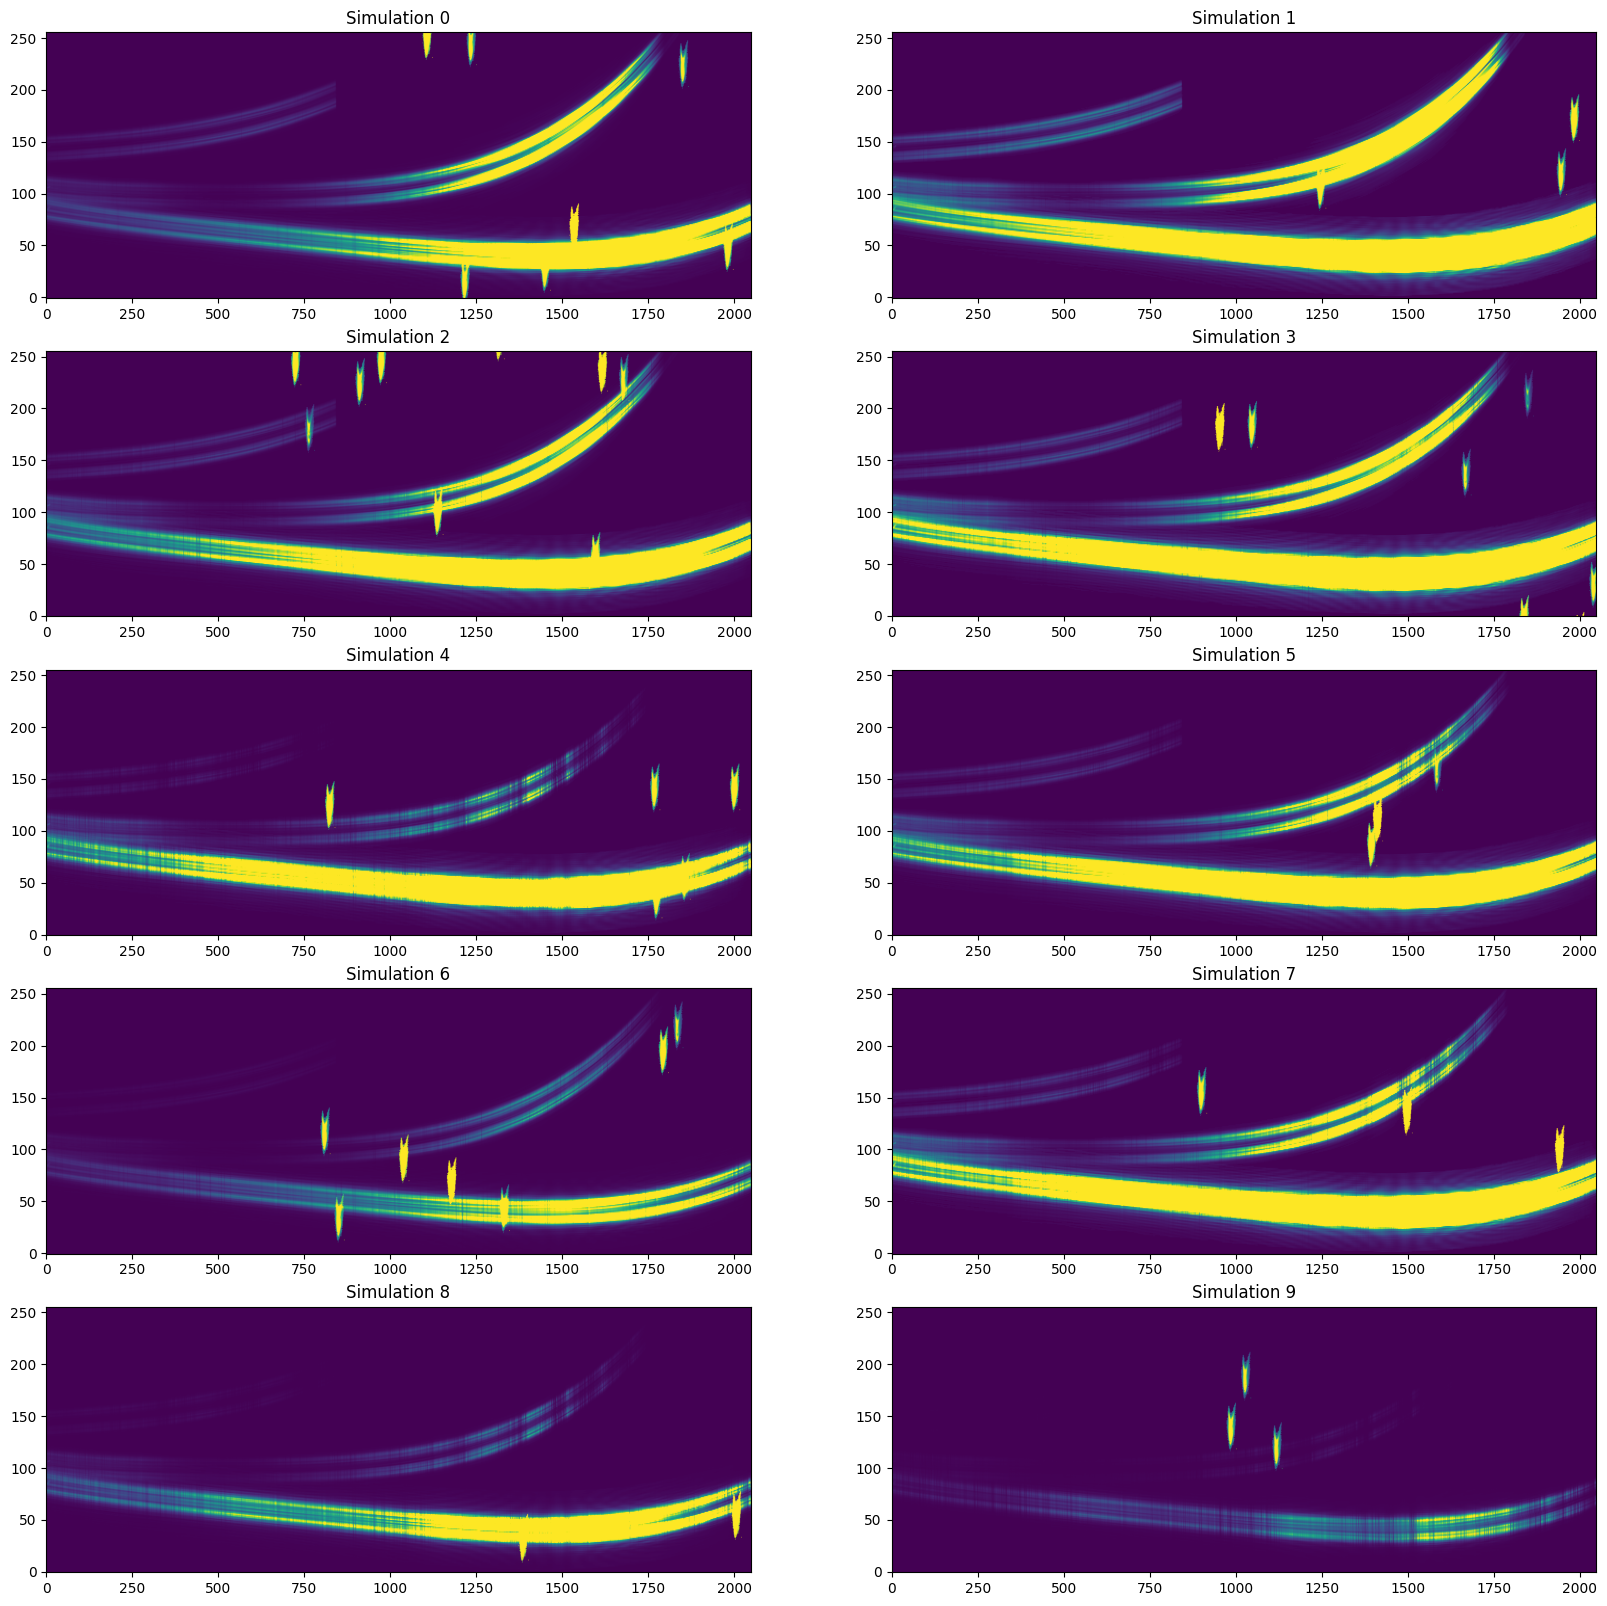

In [18]:
# plot multiple spectra from simualtion_array
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(simulation_array[i], origin="lower", aspect="auto", vmax=1e6)
    ax.set_title(f"Simulation {i}")

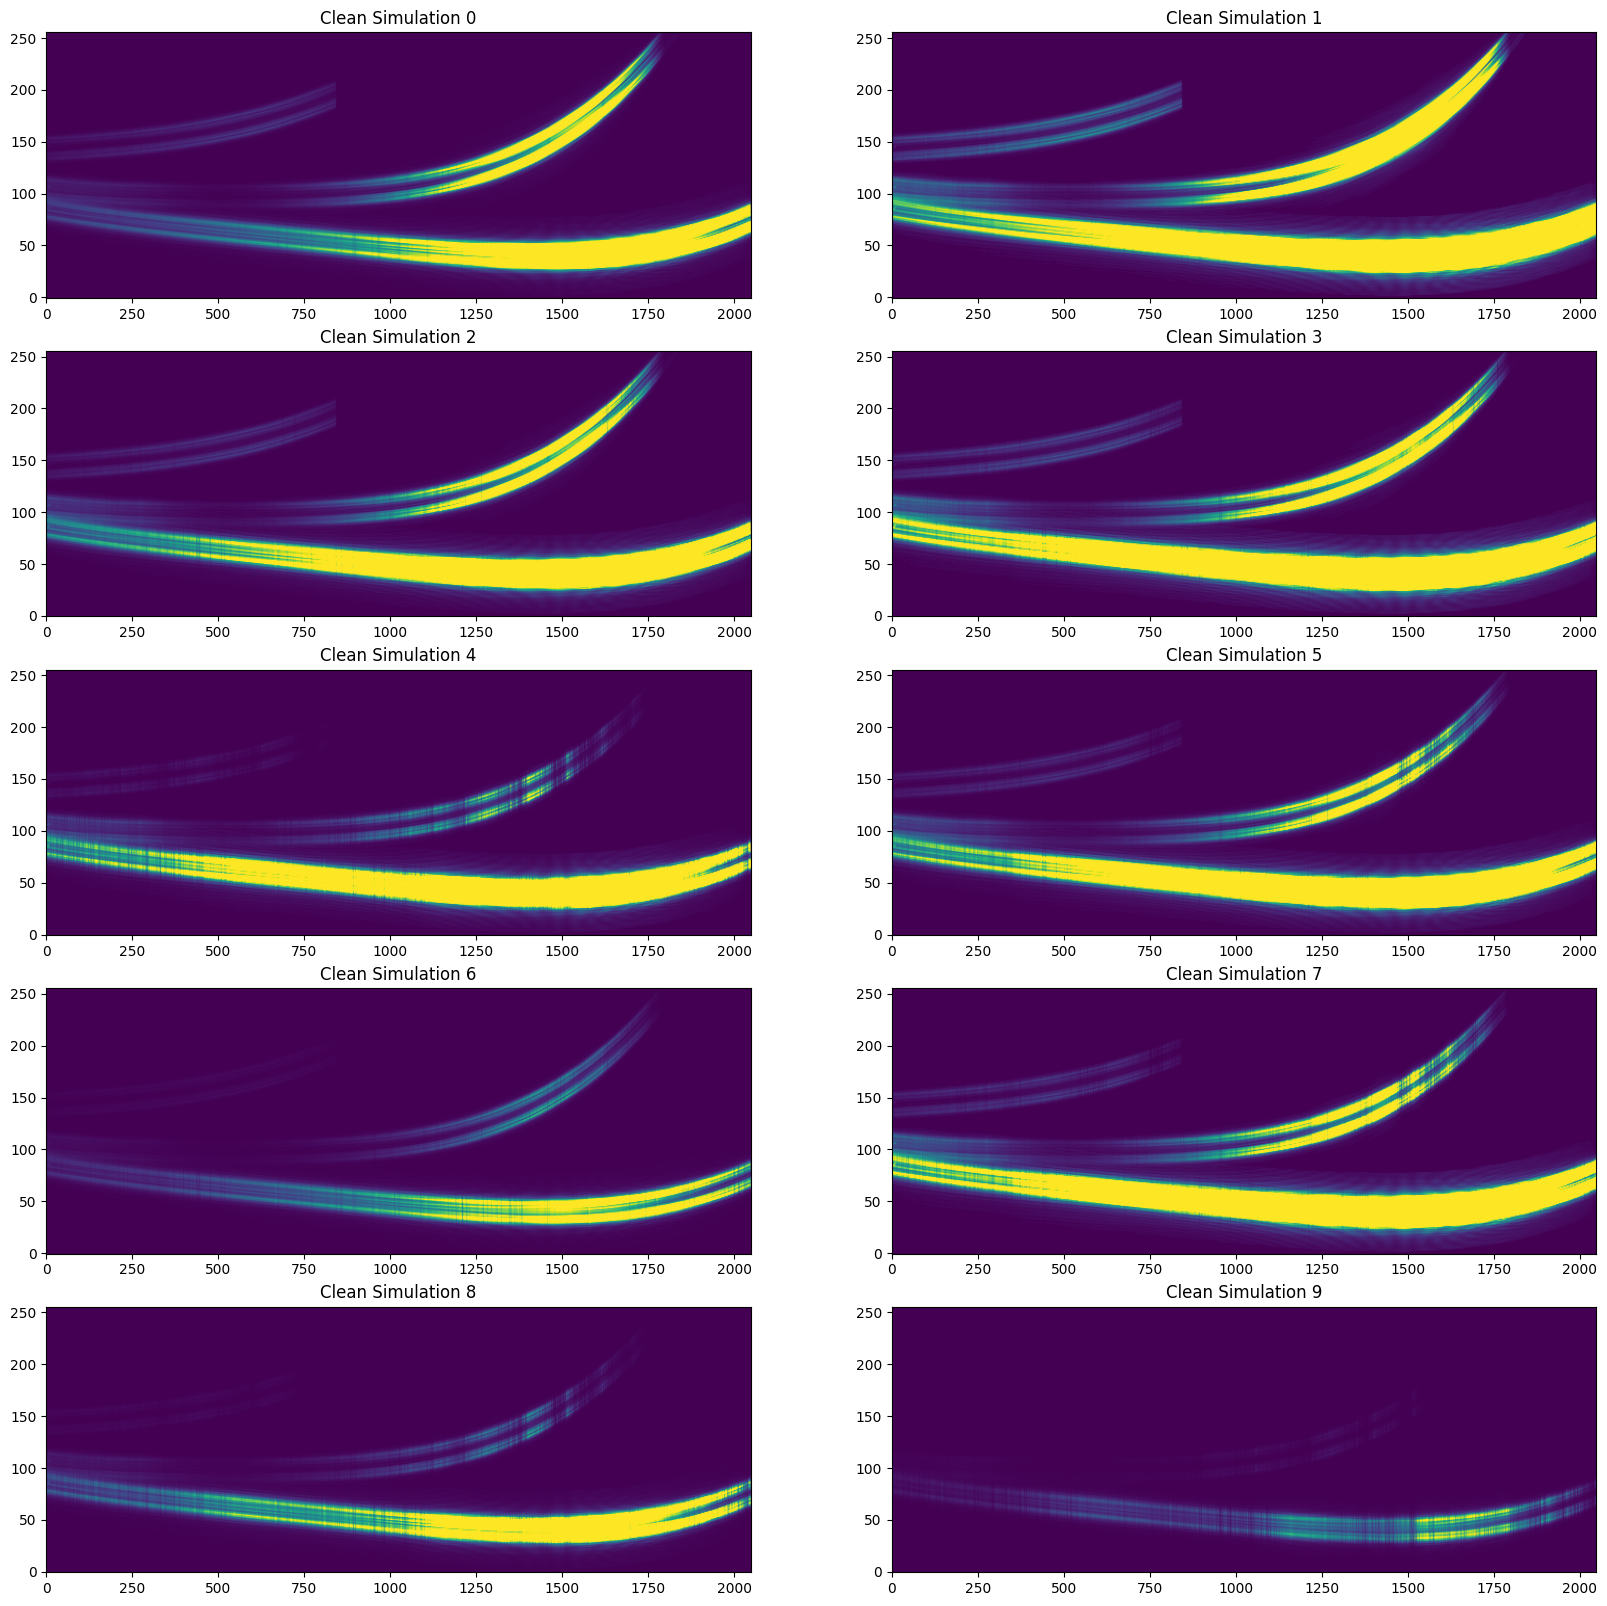

In [29]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(clean_simulation_array[i], origin="lower", aspect="auto", vmax=1e6)
    ax.set_title(f"Clean Simulation {i}")

Text(0.5, 1.0, 'Clean Simulation 0')

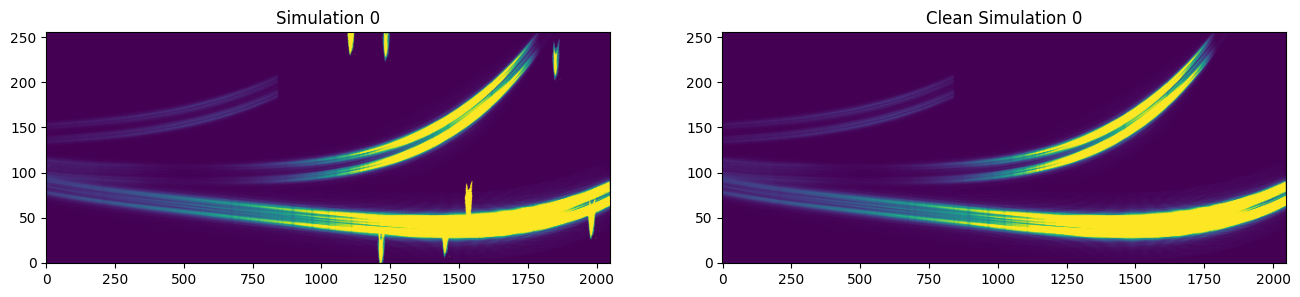

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16, 3))

ax[0].imshow(simulation_array[0], origin="lower", aspect="auto", vmax=1e6)
ax[0].set_title("Simulation 0")

ax[1].imshow(clean_simulation_array[0], origin="lower", aspect="auto", vmax=1e6)
ax[1].set_title("Clean Simulation 0")


In [34]:
for i in range(50):
    # imageio.imwrite(f"simulations/gif_images/simulation_{i}.png", simulation_array[i].astype(np.uint8))
    plt.imsave(f"simulations/gif_images/simulation_{i}.png", simulation_array[i], origin="lower", vmax=1e6)

plt.imsave("simulations/gif_images_clean/simulation_0.png", simulation_array[0], origin="lower", vmax=1e6)
plt.imsave("simulations/gif_images_clean/clean_simulation_0.png", clean_simulation_array[0], origin="lower", vmax=1e6)

In [37]:
files = os.listdir("simulations/gif_images/")
images = [imageio.imread(f"simulations/gif_images/{file}") for file in files]
imageio.mimsave("simulations/simulations.gif", images, fps=5)

files = os.listdir("simulations/gif_images_clean/")
images = [imageio.imread(f"simulations/gif_images_clean/{file}") for file in files]
imageio.mimsave("simulations/clean_simulations.gif", images, fps=5)

/tmp/ipykernel_2153636/936885261.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f"simulations/gif_images/{file}") for file in files]
/tmp/ipykernel_2153636/936885261.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f"simulations/gif_images_clean/{file}") for file in files]


In [14]:
imageio.mimsave("sims.gif", gif_images)

In [12]:
gif_images

[<Axes: title={'center': 'Simulation 0'}>,
 <Axes: title={'center': 'Simulation 1'}>,
 <Axes: title={'center': 'Simulation 2'}>,
 <Axes: title={'center': 'Simulation 3'}>,
 <Axes: title={'center': 'Simulation 4'}>,
 <Axes: title={'center': 'Simulation 5'}>,
 <Axes: title={'center': 'Simulation 6'}>,
 <Axes: title={'center': 'Simulation 7'}>,
 <Axes: title={'center': 'Simulation 8'}>,
 <Axes: title={'center': 'Simulation 9'}>]

In [ ]:
import imageio
for j in [0,1,2]: ## replace the loops with for each file in folder you need (likely only need one loop) or use something like: Path(files_dir).rglob('*.png')
    for im in [542,563,628,743]:
        images = []
        for i in reversed(range(-1,59)):
            try:
                images.append(imageio.imread(f"gif_images/{i}_{im}_{j}.png")) 
            except:
                continue
        imageio.mimsave(f'{im}_{j}.gif', images)